In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from scipy.stats import skew 
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from keras.layers import *
from keras.models import *
from keras.utils import *

/home/el/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier

In [4]:
from hdfs import InsecureClient
import os
import mysql.connector as mariadb

In [5]:
client_hdfs = InsecureClient('http://10.1.41.102:50070')

In [6]:
##############################정확도 평가 ##############################
def rmsle(y_true,y_pred):
   assert len(y_true) == len(y_pred)
   return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

In [7]:
#############################데이터 전처리 ##############################
def total_data():
    raw_file_list = ['pre_dataset_bakery.csv', 'pre_dataset_cafe.csv', 'pre_dataset_chicken.csv', 'pre_dataset_chinese.csv',
            'pre_dataset_fastFood.csv', 'pre_dataset_hof.csv', 'pre_dataset_japanese.csv', 'pre_dataset_korean.csv',
            'pre_dataset_snack.csv', 'pre_dataset_western.csv']

    df = pd.DataFrame(columns=['date', 'areaCode', 'serviceCode', 'totalNearStore', 'totalStore', 'avgNearMonth', 'nearSales', 'numberOfNearSales', 'avgMonth',
           'numberOfSales', 'totalPeople', 'totalNearPeople', 'totalBizman','totalNearBizman', 'totalLivingPeople', 'avgIncome', 'avgOutcome',
           'avgNearIcome', 'avgNearOutcome', 'totalFacility', 'totalNearFacility', 'sales'])

    for csv in raw_file_list:
        with client_hdfs.read('/user/hadoop/conf/'+csv, encoding = 'utf-8') as reader:
            df_read = pd.read_csv(reader)
        df = pd.concat([df, df_read])
    df= df[['date', 'areaCode', 'serviceCode', 'totalNearStore', 'totalStore',
       'avgNearMonth', 'nearSales', 'numberOfNearSales', 'avgMonth',
       'numberOfSales', 'totalPeople', 'totalNearPeople', 'totalBizman',
       'totalNearBizman', 'totalLivingPeople', 'avgIncome', 'avgOutcome',
       'avgNearIcome', 'avgNearOutcome', 'totalFacility', 'totalNearFacility', 'sales']]
    return df

In [70]:
#완전 row 데이터
raw_data = total_data()
raw_data.to_csv("rd.csv")

In [9]:
raw_data

,date,areaCode,serviceCode,totalNearStore,totalStore,avgNearMonth,nearSales,numberOfNearSales,avgMonth,numberOfSales,...,totalBizman,totalNearBizman,totalLivingPeople,avgIncome,avgOutcome,avgNearIcome,avgNearOutcome,totalFacility,totalNearFacility,sales
0,201606.0,11947.0,CS100008,13.0,3.0,714.000000,2.121532e+07,30420.0,82.0,8072.0,...,21113,21113,184.0,1155.0,1.116265e+08,1259,10054779088,21113,144,3.229618e+07
1,201606.0,11950.0,CS100008,8.0,3.0,800.000000,2.054022e+07,21425.0,220.0,10795.0,...,7298,7298,188.0,224.0,2.916076e+07,585,7584920304,7298,88,2.941505e+07
2,201606.0,11954.0,CS100008,9.0,2.0,852.000000,2.330980e+07,26132.0,386.0,5310.0,...,9197,9197,1974.0,424.0,5.370929e+08,663,10602653772,9197,126,2.178759e+07
3,201606.0,11956.0,CS100008,8.0,1.0,800.000000,2.054022e+07,21425.0,8.0,1299.0,...,7173,7173,718.0,1019.0,4.977985e+08,638,6834878851,7173,89,6.409191e+06
4,201606.0,11969.0,CS100008,19.0,1.0,516.000000,1.230289e+07,27088.0,62.0,1653.0,...,6843,6843,314.0,363.0,2.386042e+07,1662,9775050789,6843,110,1.081368e+07
5,201606.0,11971.0,CS100008,19.0,1.0,516.000000,1.230289e+07,27088.0,4.0,2128.0,...,8287,8287,1928.0,1603.0,5.548806e+08,1356,12828624829,8287,120,2.764364e+07
6,201606.0,11972.0,CS100008,14.0,1.0,479.000000,1.163367e+07,16761.0,33.0,920.0,...,11760,11760,1867.0,416.0,4.139257e+08,715,10120037905,11760,119,1.200751e+07
7,201606.0,11974.0,CS100008,8.0,2.0,243.000000,1.101121e+07,10581.0,165.0,6403.0,...,7506,7506,1878.0,427.0,5.888990e+08,505,14006923841,7506,153,2.835062e+07
8,201606.0,11975.0,CS100008,19.0,2.0,776.000000,1.525199e+07,33354.0,14.0,502.0,...,9846,9846,2002.0,338.0,4.937792e+08,1428,12198382760,9846,150,1.712944e+06
9,201606.0,11978.0,CS100008,8.0,1.0,208.000000,1.390888e+07,13439.0,4.0,3552.0,...,5503,5503,1123.0,423.0,3.508107e+08,487,12129843945,5503,117,2.694707e+07


In [10]:
# #쓸 자료만 추출
# raw_data = data[['date', 'areaCode', 'serviceCode', 'totalNearStore', 'totalStore',
#        'avgNearMonth', 'nearSales', 'numberOfNearSales', 'avgMonth',
#        'numberOfSales', 'totalPeople', 'totalNearPeople', 'totalBizman',
#        'totalNearBizman', 'totalLivingPeople', 'avgIncome', 'avgOutcome',
#        'avgNearIcome', 'totalFacility', 'totalNearFacility', 'sales']]
meaning_data = raw_data.iloc[:,3:]
#object타입을 float로 변환
col_goto_change = meaning_data.dtypes[meaning_data.dtypes == "object"].index
meaning_data[col_goto_change] = meaning_data[col_goto_change].apply(lambda x :x.astype('float64', raise_on_error = False))
# #쓸 자료들 중에 왜도를 na로 바꿈
skewness = meaning_data.apply(lambda x : skew(x.dropna()))
skewed_feats = skewness[skewness>0.75].index
#뽑힌 feature를 log1p 적용
meaning_data[skewed_feats] = np.log1p(meaning_data[skewed_feats])
#변수가 헷갈릴 수 있으니 logated_data로 명시
logated_data = meaning_data
#이상치 제거된 na값들을 평균값으로 대체, 소수점 2자리까지 반영
logated_data = logated_data.fillna(logated_data.mean()).apply(lambda x : round(x, 2))

/home/el/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: the raise_on_error=False keyword is deprecated, use errors='ignore' instead
/home/el/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log1p


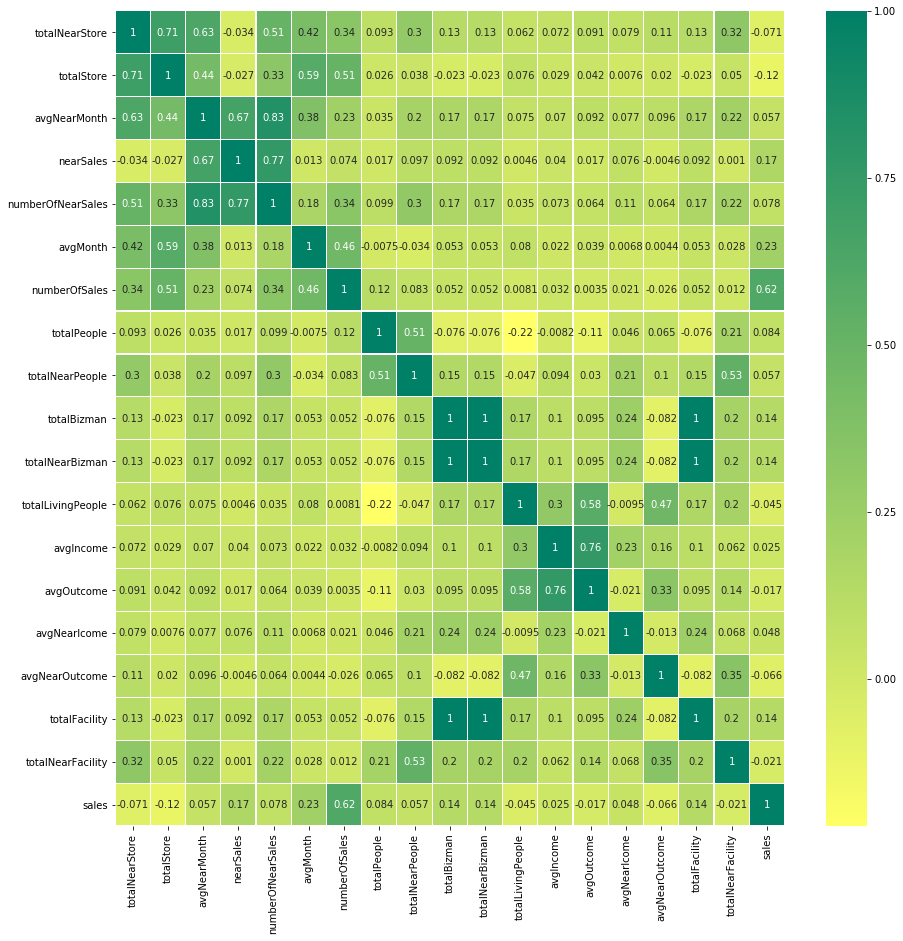

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(logated_data.corr(), annot=True, cmap='summer_r', linewidths=0.2)


In [12]:
raw_data.iloc[:,3:] = logated_data
# using_table = raw_data
# zip_feats = using_table[['avgNearMonth','nearSales','numberOfNearSales','avgMonth','numberOfSales','totalPeople','totalNearPeople','totalBizman','totalNearBizman','avgIncome','avgNearIcome','totalFacility','sales']]
# raw_data.iloc[:,3:] = zip_feats
raw_data = raw_data.dropna(axis=1)

In [13]:
raw_data

,date,areaCode,serviceCode,totalNearStore,totalStore,avgNearMonth,nearSales,numberOfNearSales,avgMonth,numberOfSales,...,totalBizman,totalNearBizman,totalLivingPeople,avgIncome,avgOutcome,avgNearIcome,avgNearOutcome,totalFacility,totalNearFacility,sales
0,201606.0,11947.0,CS100008,2.64,1.39,6.57,16.87,10.32,4.42,9.00,...,9.96,9.96,5.22,7.05,18.53,7.14,23.03,9.96,4.98,17.29
1,201606.0,11950.0,CS100008,2.20,1.39,6.69,16.84,9.97,5.40,9.29,...,8.90,8.90,5.24,5.42,17.19,6.37,22.75,8.90,4.49,17.20
2,201606.0,11954.0,CS100008,2.30,1.10,6.75,16.96,10.17,5.96,8.58,...,9.13,9.13,7.59,6.05,20.10,6.50,23.08,9.13,4.84,16.90
3,201606.0,11956.0,CS100008,2.20,0.69,6.69,16.84,9.97,2.20,7.17,...,8.88,8.88,6.58,6.93,20.03,6.46,22.65,8.88,4.50,15.67
4,201606.0,11969.0,CS100008,3.00,0.69,6.25,16.33,10.21,4.14,7.41,...,8.83,8.83,5.75,5.90,16.99,7.42,23.00,8.83,4.71,16.20
5,201606.0,11971.0,CS100008,3.00,0.69,6.25,16.33,10.21,1.61,7.66,...,9.02,9.02,7.56,7.38,20.13,7.21,23.27,9.02,4.80,17.13
6,201606.0,11972.0,CS100008,2.71,0.69,6.17,16.27,9.73,3.53,6.83,...,9.37,9.37,7.53,6.03,19.84,6.57,23.04,9.37,4.79,16.30
7,201606.0,11974.0,CS100008,2.20,1.10,5.50,16.21,9.27,5.11,8.76,...,8.92,8.92,7.54,6.06,20.19,6.23,23.36,8.92,5.04,17.16
8,201606.0,11975.0,CS100008,3.00,1.10,6.66,16.54,10.41,2.71,6.22,...,9.19,9.19,7.60,5.83,20.02,7.26,23.22,9.19,5.02,14.35
9,201606.0,11978.0,CS100008,2.20,0.69,5.34,16.45,9.51,1.61,8.18,...,8.61,8.61,7.02,6.05,19.68,6.19,23.22,8.61,4.77,17.11


In [14]:
x_origin = raw_data.iloc[:,3:-1]
scaler = MinMaxScaler()
x = scaler.fit_transform(x_origin)
raw_data.iloc[:,3:-1] = x

In [15]:
#오래걸림 주의!!
sales = raw_data['sales']
mean = sales.mean()
std = sales.std()
tmp=[]
#top=[]
cl=[]
for sale in sales:
    if sale < (mean - std):
        class_ = 'bad'
        v = 0
    elif (mean - std) <= sale < mean :
        class_ = 'not_good'
        v = 1
    elif mean <= sale < (mean + std):
        class_ = 'good'
        v = 2
    elif (mean + std) <= sale :
        class_ = 'very_good'
        v = 3
    #per_value = len(sales[sales > sale]) / len(sales)
    tmp.append(class_)
    #top.append(per_value)
    cl.append(v)

In [16]:
raw_data['class'] = tmp
#real_table['percent'] = top
raw_data['class_to_num'] = cl

In [17]:
# plt.figure(figsize=(15,15))
# sns.heatmap(total_data().corr(), annot=True, cmap='summer_r', linewidths=0.2)

In [18]:
real_table = raw_data[raw_data['date'] != 201708.0]
compare_table = raw_data[raw_data['date'] == 201708.0]

In [142]:
print(len(real_table[real_table['class_to_num']==0])/len(real_table))
print(len(real_table[real_table['class_to_num']==1])/len(real_table))
print(len(real_table[real_table['class_to_num']==2])/len(real_table))
print(len(real_table[real_table['class_to_num']==3])/len(real_table))

0.13710713553081916
0.32246466783990674
0.4012912838341197
0.13913691279515444


In [20]:
compare_table['class_to_num']

6610    2
6611    1
6612    2
6613    0
6614    0
6615    3
6616    1
6617    0
6618    2
6619    2
6620    2
6621    0
6622    2
6623    1
6624    3
6625    2
6626    3
6627    3
6628    2
6629    1
6630    0
6631    2
6632    1
6633    1
6634    3
6635    2
6636    3
6637    3
6638    1
6639    0
       ..
7516    3
7517    1
7518    2
7519    2
7520    2
7521    1
7522    3
7523    2
7524    2
7525    2
7526    3
7527    3
7528    3
7529    1
7530    3
7531    2
7532    1
7533    3
7534    2
7535    1
7536    1
7537    1
7538    3
7539    2
7540    0
7541    1
7542    3
7543    3
7544    0
7545    3
Name: class_to_num, Length: 6985, dtype: int64

In [137]:
#x,y값
x = real_table.iloc[:,3:-3]
y = real_table['class_to_num']

#c_x
c_x = compare_table.iloc[:,3:-3]
c_y = compare_table['class_to_num']

In [22]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [23]:
########################GradientBoostingClassifier################################

In [140]:
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=1, max_depth=1, random_state=0)
gbc.fit(x, y)
gbc.score(c_x, c_y)

0.7322834645669292

In [25]:
########################descision tree################################

In [26]:
#201606~201707 데이터로 학습시키고 기존의 201708데이터의 class와 predict class를 비교
dt = DecisionTreeClassifier()
dt.fit(x,y)
dt.score(c_x,c_y)

0.8177523264137437

In [33]:
###########################LogisticRegression#################################

In [27]:
lor = LogisticRegression(random_state=10)
lor.fit(x,y)
lor.score(c_x, c_y)

0.6783106657122405

In [122]:
###########################GaussianNB#################################

In [35]:
nb = GaussianNB()
nb.fit(x,y)
nb.score(c_x,c_y)

0.4830350751610594

In [36]:
###########################knn#################################

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
knn.score(c_x,c_y)

0.8456692913385827

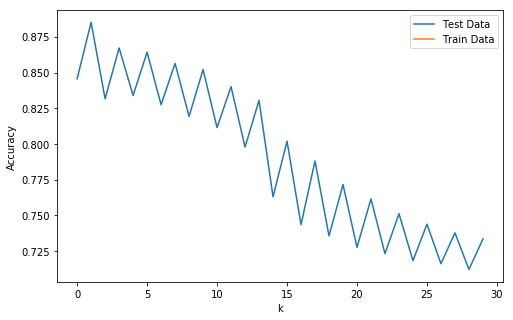

In [138]:
testAcc = []
trainAcc = []
for m in range(5, 20):
    knn = KNeighborsClassifier(n_neighbors=m, p=2, metric = 'minkowski')
    knn.fit(x,y)
    
    predY = knn.predict(c_x)
    testAcc.append((c_y == predY).sum() / len(predY))
    
    predY = knn.predict(x)
    testAcc.append((y == predY).sum() / len(predY))
plt.figure(figsize = (8, 5))
plt.plot(testAcc, label = "Test Data")
plt.plot(trainAcc, label = "Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

In [29]:
########################random forest################################

In [30]:
rf = RandomForestClassifier(n_estimators=3)
rf.fit(x, y)
rf.score(c_x,c_y)

0.8336435218324982

In [40]:
########################svm##########################################

In [109]:
small = real_table[['nearSales','avgMonth','numberOfSales','totalBizman']]
sm_x = small
sm_y = real_table['class_to_num']
sm_y 


0       3
1       2
2       2
3       1
4       2
5       2
6       2
7       2
8       0
9       2
10      1
11      0
12      3
13      3
14      2
15      1
16      3
17      2
18      0
19      1
20      0
21      3
22      2
23      3
24      0
25      2
26      3
27      1
28      2
29      2
       ..
6955    3
6956    1
6957    2
6958    2
6959    2
6960    1
6961    3
6962    2
6963    1
6964    2
6965    3
6966    2
6967    3
6968    1
6969    3
6970    2
6971    1
6972    3
6973    2
6974    1
6975    1
6976    2
6977    3
6978    2
6979    0
6980    1
6981    3
6982    3
6983    0
6984    3
Name: class_to_num, Length: 92621, dtype: int64

In [110]:
########################DNN##########################################

In [126]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(18,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer= 'adam', metrics=['accuracy'])

hist = model.fit(x, y, epochs=200,validation_split=0.2)

Train on 74096 samples, validate on 18525 samples
Epoch 1/200
74096/74096 [==============================] - 4s 50us/step - loss: 0.5840 - acc: 0.4859 - val_loss: 0.3218 - val_acc: 0.5993
Epoch 2/200
74096/74096 [==============================] - 3s 42us/step - loss: 0.3887 - acc: 0.5751 - val_loss: 0.4037 - val_acc: 0.5454
Epoch 3/200
74096/74096 [==============================] - 3s 44us/step - loss: 0.3555 - acc: 0.5950 - val_loss: 0.3245 - val_acc: 0.6000
Epoch 4/200
74096/74096 [==============================] - 3s 42us/step - loss: 0.3350 - acc: 0.6091 - val_loss: 0.2969 - val_acc: 0.6445
Epoch 5/200
74096/74096 [==============================] - 3s 42us/step - loss: 0.3253 - acc: 0.6164 - val_loss: 0.3279 - val_acc: 0.5943
Epoch 6/200
74096/74096 [==============================] - 3s 42us/step - loss: 0.3167 - acc: 0.6248 - val_loss: 0.2902 - val_acc: 0.6385
Epoch 7/200
74096/74096 [==============================] - 3s 43us/step - loss: 0.3095 - acc: 0.6318 - val_loss: 0.3037 - 

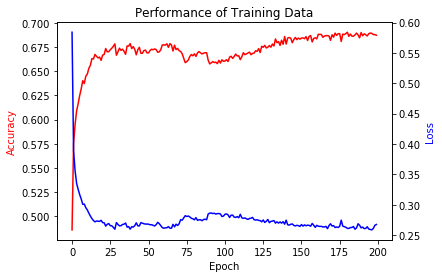

In [128]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(hist.history['acc'], color= 'red')
ax2.plot(hist.history['loss'], color= 'blue')
ax1.set_xlabel("Epoch")
ax1.set_title("Performance of Training Data")
ax1.set_ylabel("Accuracy", color = 'red')
ax2.set_ylabel("Loss", color = 'blue')
plt.show()

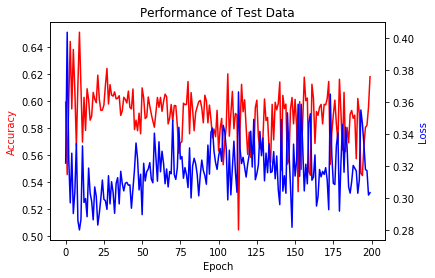

In [129]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(hist.history['val_acc'], color= 'red')
ax2.plot(hist.history['val_loss'], color= 'blue')
ax1.set_xlabel("Epoch")
ax1.set_title("Performance of Test Data")
ax1.set_ylabel("Accuracy", color = 'red')
ax2.set_ylabel("Loss", color = 'blue')
plt.show()

In [130]:
k = pd.DataFrame(pred_c_y)

In [133]:
t= []
for i in k.iloc[:,0] :
    t.append(round(i))

In [134]:
qw = 0;
for z, x in zip(c_y, t):
    if z == x :
        qw = qw+1;
        
print(qw/len(c_y))

0.5225483178239084


In [52]:
x

,totalNearStore,totalStore,avgNearMonth,nearSales,numberOfNearSales,avgMonth,numberOfSales,totalPeople,totalNearPeople,totalBizman,totalNearBizman,totalLivingPeople,avgIncome,avgOutcome,avgNearIcome,avgNearOutcome,totalFacility,totalNearFacility
0,0.329392,0.180412,0.626908,0.837221,0.749455,0.438057,0.642609,0.893345,0.829822,0.685817,0.685817,0.580645,0.663217,0.841890,0.377522,0.624642,0.685817,0.643617
1,0.255068,0.180412,0.638359,0.835732,0.724038,0.535183,0.667826,0.824977,0.664506,0.495512,0.495512,0.582870,0.509878,0.781009,0.155620,0.544413,0.495512,0.513298
2,0.271959,0.105670,0.644084,0.841687,0.738562,0.590684,0.606087,0.722881,0.651540,0.536804,0.536804,0.844271,0.569144,0.913221,0.193084,0.638968,0.536804,0.606383
3,0.255068,0.000000,0.638359,0.835732,0.724038,0.218038,0.483478,0.804011,0.666126,0.491921,0.491921,0.731924,0.651929,0.910041,0.181556,0.515759,0.491921,0.515957
4,0.390203,0.000000,0.596374,0.810422,0.741467,0.410307,0.504348,0.845943,0.752026,0.482944,0.482944,0.639600,0.555033,0.771922,0.458213,0.616046,0.482944,0.571809
5,0.390203,0.000000,0.596374,0.810422,0.741467,0.159564,0.526087,0.767548,0.735818,0.517056,0.517056,0.840934,0.694262,0.914584,0.397695,0.693410,0.517056,0.595745
6,0.341216,0.000000,0.588740,0.807444,0.706609,0.349851,0.453913,0.719234,0.674230,0.579892,0.579892,0.837597,0.567262,0.901408,0.213256,0.627507,0.579892,0.593085
7,0.255068,0.105670,0.524809,0.804467,0.673203,0.506442,0.621739,0.817685,0.823339,0.499102,0.499102,0.838710,0.570085,0.917310,0.115274,0.719198,0.499102,0.659574
8,0.390203,0.105670,0.635496,0.820844,0.755991,0.268583,0.400870,0.813127,0.805511,0.547576,0.547576,0.845384,0.548448,0.909587,0.412104,0.679083,0.547576,0.654255
9,0.255068,0.000000,0.509542,0.816377,0.690632,0.159564,0.571304,0.849590,0.828201,0.443447,0.443447,0.780868,0.569144,0.894139,0.103746,0.679083,0.443447,0.587766


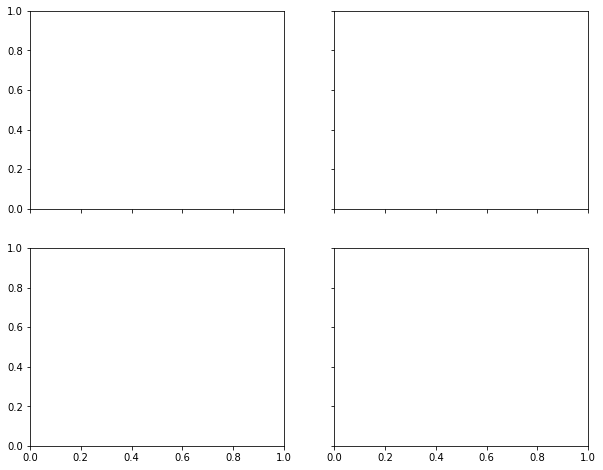

In [68]:
import matplotlib.pyplot as plt
from itertools import product
# Plotting decision regions
x_min, x_max = -1, 1
y_min, y_max = -1, 4
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                      np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))


In [69]:
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [gbc, knn, rf, evc],
                        ['GradientBoostingClassifier', 'LogisticRegression', 'KNeighborsClassifier(n_neighbors=5)', 'RandomForestClassifier','DNN','VotingClassifier']):

    Z = clf.predict(c_x,c_y)
    Z = Z.reshape(c_x)

    axarr[idx[0], idx[1]].contourf(c_x, c_y, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x, y, c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

TypeError: predict() takes 2 positional arguments but 3 were given

In [60]:
k = 0
for v, m in zip(c_y, t):
    if v == m :
        k = k+1
print( k / len(c_y))

0.718253400143164


In [57]:
#########Voting Classifier - Multiple Model Ensemble
evc = VotingClassifier(estimators = [('gbc', gbc),('knn', knn),('rf', rf)], voting = 'soft')

In [58]:
evc.fit(x, y)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, m...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [59]:
evc.score(c_x, c_y)

/home/el/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8785969935576234

In [64]:
real_class_predict = evc.predict(c_x)

/home/el/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [144]:
#x,y값
r_x = real_table.iloc[:,3:-3]
r_y = real_table['sales']

#c_x
c_r_x = compare_table.iloc[:,3:-3]
c_r_y = compare_table['sales']

In [145]:
####################################################LR모델#####################################
reg = LinearRegression()
reg.fit(r_x,r_y)
print(reg.score(c_r_x, c_r_y))

0.8070638368898497


In [146]:
####################################################Ridge 모델#####################################
ridge_m = Ridge()
ridge_params = { 'max_iter':[3000], 'alpha': [0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)
grid_ridge_m = GridSearchCV( ridge_m, ridge_params, cv = 5)
grid_ridge_m.fit(r_x,r_y)
print(grid_ridge_m.score(c_r_x, c_r_y))

0.8070589466174517


In [68]:
####################################################Lasso 모델#####################################
lasso_m = Lasso()
alpha = 1/np.array([0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = { 'max_iter':[3000], 'alpha': alpha}
grid_lasso_m = GridSearchCV( lasso_m, lasso_params, cv = 5)
grid_lasso_m.fit(r_x,r_y)
print(grid_lasso_m.score(c_r_x, c_r_y))
pred_lasso = grid_lasso_m.predict(c_r_x)
print(pred_lasso)
print(len(pred_lasso))

0.7979919684662594
[17.27540618 15.83468873 17.20626756 ... 17.74985032 15.05540659
 15.56576825]
6985


In [ ]:
####################################################svr 모델#####################################

In [74]:
from sklearn.svm import SVR
svr = SVR(C = 1.0, epsilon = 0.2)
svr.fit(r_x,r_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:
svr.score(c_r_x, c_r_y)

0.843479285318787

In [76]:
pred_svr_c = svr.predict(c_r_x)
pred_svr = svr.predict(r_x)
print(pred_svr)
print(len(pred_svr))

[17.06332777 17.21091294 17.07417451 ... 17.86863744 14.96350851
 15.94478041]
92621


In [173]:
####################################################gbr 모델#####################################

In [77]:
gbr = GradientBoostingRegressor()
gbr.fit(r_x,r_y)
gbr.score(c_r_x, c_r_y)

0.8041711260320736

In [78]:
pred_gbr_c = gbr.predict(c_r_x)
pred_gbr = gbr.predict(r_x)
print(pred_gbr)
print(len(pred_gbr))

[17.04540084 17.27381107 17.19853938 ... 17.44187399 14.88313093
 15.89253709]
92621


In [79]:
len(c_r_y)
cry_list = c_r_y.tolist()
ry_list = r_y.tolist()

In [80]:
origin_df = pd.DataFrame(columns = ['ridge','svr','gbr'])
pred_df = pd.DataFrame(columns = ['ridge_c','svr_c','gbr_c' ])

In [81]:
origin_df['ridge'] = pred_ridge
origin_df['svr'] = pred_svr
origin_df['gbr'] = pred_gbr
pred_df['ridge_c'] = pred_ridge_c
pred_df['svr_c'] = pred_svr_c
pred_df['gbr_c'] = pred_gbr_c

In [82]:
origin_df['real'] = ry_list
pred_df['real'] = cry_list

In [ ]:
####################################################regression ensemble모델#####################################

In [83]:
stacker= LinearRegression()

In [84]:
stacker.fit(origin_df[['ridge', 'svr', 'gbr']], origin_df['real'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
stacker.predict(pred_df[['ridge_c', 'svr_c', 'gbr_c']])

array([17.13265319, 15.86632715, 17.16177453, ..., 17.43985124,
       14.92294216, 15.57369996])

In [87]:
print(stacker.score(pred_df[['ridge_c', 'svr_c', 'gbr_c']],pred_df['real']))
real_predict = stacker.predict(pred_df[['ridge_c', 'svr_c', 'gbr_c']])

0.8446495016126224


In [99]:
real_predict

array([17.13265319, 15.86632715, 17.16177453, ..., 17.43985124,
       14.92294216, 15.57369996])

In [105]:
rp = pd.DataFrame(real_predict)

In [109]:
rp = rp.apply(lambda x : np.exp(x))

In [217]:
####################################DB(1708_data_scaled) 가져오기############################

In [90]:
mariadb_connection = mariadb.connect(user='root', password='el', database='el')
scaled_data = pd.read_sql('SELECT * FROM 1708_data', con=mariadb_connection)

In [91]:
scaled_data = scaled_data.drop(['date'],axis=1)

In [92]:
new_scaled_data = scaled_data[['areaCode','serviceCode']]

In [110]:
new_scaled_data['sales'] = rp

/home/el/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [111]:
new_scaled_data

,areaCode,serviceCode,sales,class
0,12171.0,CS100008,2.758143e+07,2
1,12172.0,CS100008,7.774247e+06,1
2,12176.0,CS100008,2.839645e+07,2
3,12178.0,CS100008,2.804988e+06,1
4,12181.0,CS100008,3.373256e+06,1
5,12436.0,CS100008,5.106823e+07,3
6,12398.0,CS100008,7.204482e+06,1
7,12400.0,CS100008,1.916815e+05,0
8,12732.0,CS100008,2.404246e+07,2
9,12733.0,CS100008,1.283930e+07,2


In [97]:
new_scaled_data['class'] = real_class_predict

/home/el/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [113]:
sales = new_scaled_data['sales']
top=[]
for sale in sales:
    per_value = len(sales[sales > sale]) / len(sales)
    top.append(per_value)

In [114]:
new_scaled_data['percentage'] = top

/home/el/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [134]:
new_scaled_data

,areaCode,serviceCode,sales,percentage,class
0,12171.0,CS100008,2.758143e+07,0.109091,good
1,12172.0,CS100008,7.774247e+06,0.610451,not_good
2,12176.0,CS100008,2.839645e+07,0.101646,good
3,12178.0,CS100008,2.804988e+06,0.891625,not_good
4,12181.0,CS100008,3.373256e+06,0.863565,not_good
5,12436.0,CS100008,5.106823e+07,0.026342,very_good
6,12398.0,CS100008,7.204482e+06,0.636793,not_good
7,12400.0,CS100008,1.916815e+05,0.996994,bad
8,12732.0,CS100008,2.404246e+07,0.142305,good
9,12733.0,CS100008,1.283930e+07,0.375948,good


In [116]:
#오래걸림 주의!!
class_ = new_scaled_data['class']
cl_tmp=[]
for clas in class_:
    if clas == 0 :
        clas = 'bad'
    elif clas == 1 :
        clas = 'not_good'
    elif clas == 2 :
        clas = 'good'    
    elif clas == 3 :
        clas = 'very_good'
    cl_tmp.append(clas)

In [124]:
new_scaled_data['class'] = cl_tmp

In [126]:
new_scaled_data = new_scaled_data.drop(['class_name'], axis = 1)

In [127]:
new_scaled_data

,areaCode,serviceCode,sales,percentage,class
0,12171.0,CS100008,2.758143e+07,0.109091,good
1,12172.0,CS100008,7.774247e+06,0.610451,not_good
2,12176.0,CS100008,2.839645e+07,0.101646,good
3,12178.0,CS100008,2.804988e+06,0.891625,not_good
4,12181.0,CS100008,3.373256e+06,0.863565,not_good
5,12436.0,CS100008,5.106823e+07,0.026342,very_good
6,12398.0,CS100008,7.204482e+06,0.636793,not_good
7,12400.0,CS100008,1.916815e+05,0.996994,bad
8,12732.0,CS100008,2.404246e+07,0.142305,good
9,12733.0,CS100008,1.283930e+07,0.375948,good


In [128]:
new_scaled_data.to_csv("../output/results.csv")

In [129]:
mariadb_connection = mariadb.connect(user='root', password='el', database='el')
cursor = mariadb_connection.cursor()

In [130]:
for row in new_scaled_data.iterrows():
    input_value =row[1]
    cursor.execute("insert into results values ({})".format(",".join(repr(e) for e in input_value)))

In [131]:
cursor.execute("commit")